In [6]:
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [7]:
df = pd.read_csv('Iris.csv')

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
from sklearn.cluster import KMeans

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    sse.append(km.inertia_)

In [11]:
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.930963049671746,
 34.2045677933178,
 30.077530998389694,
 28.187936328164604]

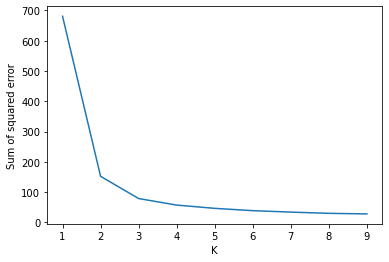

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['SepalLengthCm']])
df['SSepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SSepalWidthCm'] = scaler.transform(df[['SepalWidthCm']])

scaler.fit(df[['PetalLengthCm']])
df['SPetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])


scaler.fit(df[['PetalWidthCm']])
df['SPetalWidthCm'] = scaler.transform(df[['PetalWidthCm']])

In [19]:
sse

[41.13817202297779,
 12.143688281579719,
 6.9981140048267605,
 5.5328310030819,
 4.571923613060554,
 3.9150575076663006,
 3.466653101537882,
 3.1336244043454324,
 2.8157640660994767]

In [15]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SSepalLengthCm,SSepalWidthCm,SPetalLengthCm,SPetalWidthCm
0,1,5.1,3.5,1.4,0.2,"Iris,setosa",0.222222,0.625000,0.067797,0.041667
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.166667,0.416667,0.067797,0.041667
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.111111,0.500000,0.050847,0.041667


In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SSepalLengthCm', 'SSepalWidthCm', 'SPetalLengthCm',
       'SPetalWidthCm']])
    sse.append(km.inertia_)

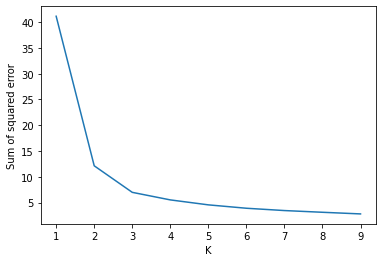

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['SSepalLengthCm', 'SSepalWidthCm', 'SPetalLengthCm',
       'SPetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [20]:
df['y_predicted'] = y_predicted

In [22]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SSepalLengthCm,SSepalWidthCm,SPetalLengthCm,SPetalWidthCm,y_predicted
0,1,5.1,3.5,1.4,0.2,"Iris,setosa",0.222222,0.625000,0.067797,0.041667,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.166667,0.416667,0.067797,0.041667,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.111111,0.500000,0.050847,0.041667,0


In [23]:
df['y_predicted'].value_counts()

2    61
0    50
1    39
Name: y_predicted, dtype: int64